In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [22]:
# Ensure the file path is correct
climate_df = pd.read_csv("E:\\Shubh\\projects\\100dx DevPro\\internship projects\\climate changes prediction\\climate_final_dataset.csv")

       Temperature_Anomaly    CO2  Sea_Level_mm  CO2_scaled  Sea_Level_scaled  \
count             4.000000    4.0      4.000000    4.000000          4.000000   
mean              0.400000  312.5      5.750000    0.000000         -0.306186   
std               0.244949   15.0      0.957427    1.154701          1.172604   
min               0.200000  300.0      5.000000   -0.962250         -1.224745   
25%               0.200000  300.0      5.000000   -0.962250         -1.224745   
50%               0.350000  310.0      5.500000   -0.192450         -0.612372   
75%               0.550000  322.5      6.250000    0.769800          0.306186   
max               0.700000  330.0      7.000000    1.347151          1.224745   

       Temp_Rolling_Mean  CO2_Lag_1  
count           4.000000        4.0  
mean            0.341667      305.0  
std             0.083333       10.0  
min             0.300000      300.0  
25%             0.300000      300.0  
50%             0.300000      300.0  
75% 

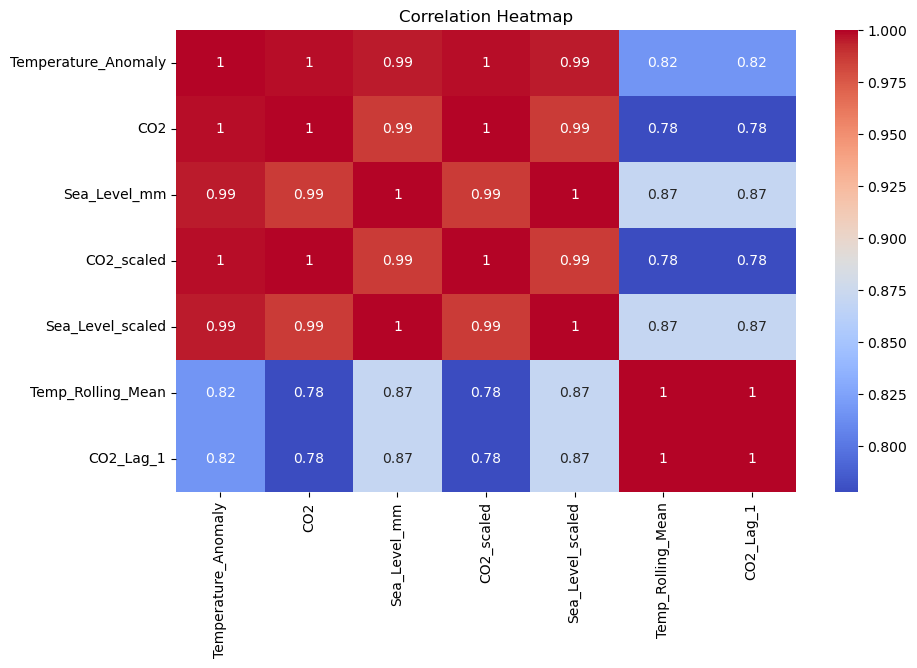

ValueError: Could not interpret value `Year` for parameter `x`

<Figure size 1200x600 with 0 Axes>

In [31]:
print(climate_df.describe())
print(climate_df.info())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(climate_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Trend plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=climate_df, x='Year', y='Temperature_Anomaly', label='Temperature Anomaly')
sns.lineplot(data=climate_df, x='Year', y='CO2', label='CO2')
sns.lineplot(data=climate_df, x='Year', y='Sea_Level_mm', label='Sea Level (mm)')
plt.title("Climate Indicators Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [23]:

from sklearn.impute import SimpleImputer # Importing the SimpleImputer class from sklearn for handling missing values
# This script demonstrates how to handle missing values in a climate dataset using the SimpleImputer from sklearn. 

# Create a sample dataframe for demonstration
climate_df = pd.DataFrame({
	'Temperature_Anomaly': [0.2, None, 0.5, 0.7],
	'CO2': [300, None, 320, 330],
	'Sea_Level_mm': [None, 5, 6, 7] 
})

# Using pandas fillna method for forward fill strategy to handle missing values
climate_df[['Temperature_Anomaly', 'CO2', 'Sea_Level_mm']] = climate_df[['Temperature_Anomaly', 'CO2', 'Sea_Level_mm']].fillna(method='ffill')
print(climate_df)  # Display the dataframe after handling missing values 

   Temperature_Anomaly    CO2  Sea_Level_mm
0                  0.2  300.0           NaN
1                  0.2  300.0           5.0
2                  0.5  320.0           6.0
3                  0.7  330.0           7.0


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(climate_df[['CO2', 'Sea_Level_mm']])
climate_df[['CO2_scaled', 'Sea_Level_scaled']] = scaled_features 

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(climate_df[['CO2', 'Sea_Level_mm']])
climate_df[['CO2_scaled', 'Sea_Level_scaled']] = scaled_features 

In [26]:
# === 5. Feature Engineering ===
# Rolling averages / lag features example
climate_df['Temp_Rolling_Mean'] = climate_df['Temperature_Anomaly'].rolling(window=3).mean()
climate_df['CO2_Lag_1'] = climate_df['CO2'].shift(1)
climate_df.fillna(method='bfill', inplace=True)

In [27]:
features = ['CO2_scaled', 'Sea_Level_scaled', 'Temp_Rolling_Mean', 'CO2_Lag_1']
target = 'Temperature_Anomaly'

X = climate_df[features]
y = climate_df[target]

In [28]:
# Corrected Cell In[8]
import numpy as np  # Ensure NumPy is imported

future_years = pd.DataFrame({
    'Year': range(2025, 2036),
    'CO2_scaled': np.linspace(X['CO2_scaled'].mean(), X['CO2_scaled'].mean() + 1, 11),
    'Sea_Level_scaled': np.linspace(X['Sea_Level_scaled'].mean(), X['Sea_Level_scaled'].mean() + 1, 11),
    'Temp_Rolling_Mean': [climate_df['Temp_Rolling_Mean'].iloc[-1]] * 11,
    'CO2_Lag_1': [climate_df['CO2'].iloc[-1]] * 11
})


In [29]:
features = ['CO2_scaled', 'Sea_Level_scaled', 'Temp_Rolling_Mean', 'CO2_Lag_1']
target = 'Temperature_Anomaly'

X = climate_df[features]
y = climate_df[target]

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R-squared:", r2_score(y_test, predictions))

    plt.figure(figsize=(8, 4))
    sns.residplot(x=predictions, y=y_test - predictions, lowess=True)
    plt.title("Residual Plot")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test, y=predictions)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title("Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.show()

print("\nLinear Regression Evaluation")
evaluate_model(lr_model, X_test, y_test)

print("\nRandom Forest Evaluation")
evaluate_model(rf_model, X_test, y_test)


Linear Regression Evaluation


NameError: name 'lr_model' is not defined

In [ ]:
future_years = pd.DataFrame({
    'Year': range(2025, 2036),
    'CO2_scaled': np.linspace(X['CO2_scaled'].mean(), X['CO2_scaled'].mean() + 1, 11),
    'Sea_Level_scaled': np.linspace(X['Sea_Level_scaled'].mean(), X['Sea_Level_scaled'].mean() + 1, 11),
    'Temp_Rolling_Mean': [climate_df['Temp_Rolling_Mean'].iloc[-1]] * 11,
    'CO2_Lag_1': [climate_df['CO2'].iloc[-1]] * 11
})

future_predictions_lr = lr_model.predict(future_years[['CO2_scaled', 'Sea_Level_scaled', 'Temp_Rolling_Mean', 'CO2_Lag_1']])
future_predictions_rf = rf_model.predict(future_years[['CO2_scaled', 'Sea_Level_scaled', 'Temp_Rolling_Mean', 'CO2_Lag_1']])

In [ ]:
future_features = future_years[features]
future_preds = rf_model.predict(future_features) 

plt.figure(figsize=(10, 5))
plt.plot(future_years['Year'], future_preds, marker='o', label='Projected Temperature Anomaly')
plt.title("Projected Temperature Anomaly (2025–2035)")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly")
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()
